## US Accidents 2016-2021

Importing libraries

In [3]:
import pandas as pd
import numpy as np
import matplotlib as mp

Fetching the data

In [4]:
df = pd.read_csv("US_Accidents_Dec21_updated.csv")

In [5]:
print(df.head)

<bound method NDFrame.head of                 ID  Severity           Start_Time             End_Time  \
0              A-1         3  2016-02-08 00:37:08  2016-02-08 06:37:08   
1              A-2         2  2016-02-08 05:56:20  2016-02-08 11:56:20   
2              A-3         2  2016-02-08 06:15:39  2016-02-08 12:15:39   
3              A-4         2  2016-02-08 06:51:45  2016-02-08 12:51:45   
4              A-5         3  2016-02-08 07:53:43  2016-02-08 13:53:43   
...            ...       ...                  ...                  ...   
2845337  A-2845338         2  2019-08-23 18:03:25  2019-08-23 18:32:01   
2845338  A-2845339         2  2019-08-23 19:11:30  2019-08-23 19:38:23   
2845339  A-2845340         2  2019-08-23 19:00:21  2019-08-23 19:28:49   
2845340  A-2845341         2  2019-08-23 19:00:21  2019-08-23 19:29:42   
2845341  A-2845342         2  2019-08-23 18:52:06  2019-08-23 19:21:31   

         Start_Lat   Start_Lng    End_Lat     End_Lng  Distance(mi)  \
0        4

Exploring the data and cleaning

In [9]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2845342 entries, 0 to 2845341
Data columns (total 47 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   ID                     object 
 1   Severity               int64  
 2   Start_Time             object 
 3   End_Time               object 
 4   Start_Lat              float64
 5   Start_Lng              float64
 6   End_Lat                float64
 7   End_Lng                float64
 8   Distance(mi)           float64
 9   Description            object 
 10  Number                 float64
 11  Street                 object 
 12  Side                   object 
 13  City                   object 
 14  County                 object 
 15  State                  object 
 16  Zipcode                object 
 17  Country                object 
 18  Timezone               object 
 19  Airport_Code           object 
 20  Weather_Timestamp      object 
 21  Temperature(F)         float64
 22  Wind_Chill(F)     

In [10]:
df.describe()

Severity     Start_Lat     Start_Lng       End_Lat       End_Lng  \
count  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06  2.845342e+06   
mean   2.137572e+00  3.624520e+01 -9.711463e+01  3.624532e+01 -9.711439e+01   
std    4.787216e-01  5.363797e+00  1.831782e+01  5.363873e+00  1.831763e+01   
min    1.000000e+00  2.456603e+01 -1.245481e+02  2.456601e+01 -1.245457e+02   
25%    2.000000e+00  3.344517e+01 -1.180331e+02  3.344628e+01 -1.180333e+02   
50%    2.000000e+00  3.609861e+01 -9.241808e+01  3.609799e+01 -9.241772e+01   
75%    2.000000e+00  4.016024e+01 -8.037243e+01  4.016105e+01 -8.037338e+01   
max    4.000000e+00  4.900058e+01 -6.711317e+01  4.907500e+01 -6.710924e+01   

       Distance(mi)        Number  Temperature(F)  Wind_Chill(F)  \
count  2.845342e+06  1.101431e+06    2.776068e+06   2.375699e+06   
mean   7.026779e-01  8.089408e+03    6.179356e+01   5.965823e+01   
std    1.560361e+00  1.836009e+04    1.862263e+01   2.116097e+01   
min    0.000000e+00  0.000000e+00   -8.900000e+01  -8.900000e+01   
25%    5.200000e-02  1.270000e+03    5.000000e+01   4.600000e+01   
50%    2.440000e-01  4.007000e+03    6.400000e+01   6.300000e+01   
75%    7.640000e-01  9.567000e+03    7.600000e+01   7.600000e+01   
max    1.551860e+02  9.999997e+06    1.960000e+02   1.960000e+02   

        Humidity(%)  Pressure(in)  Visibility(mi)  Wind_Speed(mph)  \
count  2.772250e+06  2.786142e+06    2.774796e+06     2.687398e+06   
mean   6.436545e+01  2.947234e+01    9.099391e+00     7.395044e+00   
std    2.287457e+01  1.045286e+00    2.717546e+00     5.527454e+00   
min    1.000000e+00  0.000000e+00    0.000000e+00     0.000000e+00   
25%    4.800000e+01  2.931000e+01    1.000000e+01     3.500000e+00   
50%    6.700000e+01  2.982000e+01    1.000000e+01     7.000000e+00   
75%    8.300000e+01  3.001000e+01    1.000000e+01     1.000000e+01   
max    1.000000e+02  5.890000e+01    1.400000e+02     1.087000e+03   

       Precipitation(in)  
count       2.295884e+06  
mean        7.016940e-03  
std         9.348831e-02  
min         0.000000e+00  
25%         0.000000e+00  
50%         0.000000e+00  
75%         0.000000e+00  
max         2.400000e+01

In [15]:
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']

In [19]:
numeric_df = df.select_dtypes(include = numerics)
len(numeric_df.columns)

14

In [35]:
df.isna().sum()

ID                             0
Severity                       0
Start_Time                     0
End_Time                       0
Start_Lat                      0
Start_Lng                      0
End_Lat                        0
End_Lng                        0
Distance(mi)                   0
Description                    0
Number                   1743911
Street                         2
Side                           0
City                         137
County                         0
State                          0
Zipcode                     1319
Country                        0
Timezone                    3659
Airport_Code                9549
Weather_Timestamp          50736
Temperature(F)             69274
Wind_Chill(F)             469643
Humidity(%)                73092
Pressure(in)               59200
Visibility(mi)             70546
Wind_Direction             73775
Wind_Speed(mph)           157944
Precipitation(in)         549458
Weather_Condition          70636
Amenity   

In [27]:
## founding the null values in each column if exists
missing_values = df.isna().sum().sort_values(ascending = False)

<AxesSubplot:>

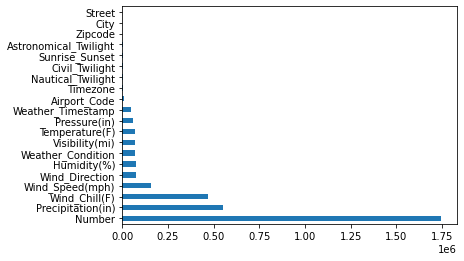

In [33]:
missing_values[missing_values!=0].plot(kind ='barh')

Exploratory data analysis and visualization
## Columns to analyze
1.City
2.Start time
3.Start lat, long
4.City
5.Temperature

### City

In [5]:
cities = df.City.unique()
len(cities)

11682

In [6]:
cities_by_accident = df["City"].value_counts()
print(cities_by_accident)


Miami                           106966
Los Angeles                      68956
Orlando                          54691
Dallas                           41979
Houston                          39448
                                 ...  
Ridgedale                            1
Sekiu                                1
Wooldridge                           1
Bullock                              1
American Fork-Pleasant Grove         1
Name: City, Length: 11681, dtype: int64


<AxesSubplot:>

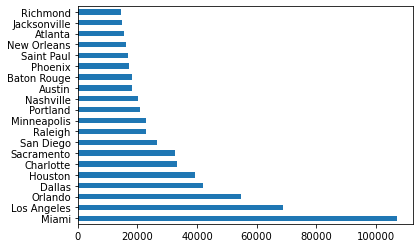

In [13]:
cities_by_accident[:20].plot(kind ='barh')

In [18]:
import seaborn as sns

In [19]:
sns.set_style('darkgrid')

In [33]:
high_accident_cities = cities_by_accident[cities_by_accident>=1000]

In [34]:
low_accident_cities = cities_by_accident[cities_by_accident<1000]

In [36]:
len(high_accident_cities)/len(cities)

0.04245848313644924

<AxesSubplot:xlabel='City', ylabel='Count'>

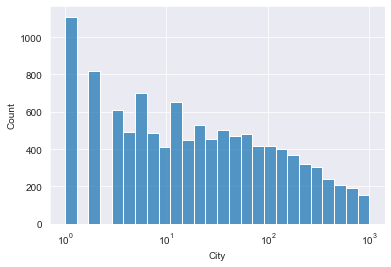

In [38]:
sns.histplot(low_accident_cities, log_scale = True)

In [45]:
cities_by_accident[cities_by_accident == 1]

Carney                          1
Waverly Hall                    1
Center Sandwich                 1
Glen Flora                      1
Sulphur Springs                 1
                               ..
Ridgedale                       1
Sekiu                           1
Wooldridge                      1
Bullock                         1
American Fork-Pleasant Grove    1
Name: City, Length: 1110, dtype: int64

### Start Date

In [7]:
df.Start_Time

0          2016-02-08 00:37:08
1          2016-02-08 05:56:20
2          2016-02-08 06:15:39
3          2016-02-08 06:51:45
4          2016-02-08 07:53:43
                  ...         
2845337    2019-08-23 18:03:25
2845338    2019-08-23 19:11:30
2845339    2019-08-23 19:00:21
2845340    2019-08-23 19:00:21
2845341    2019-08-23 18:52:06
Name: Start_Time, Length: 2845342, dtype: object

In [48]:
## After analysing start date from df.info, it is in format of string

In [8]:
df['Start_Time'] = pd.to_datetime(df['Start_Time'])

In [51]:
df.Start_Time[:10]

0   2016-02-08 00:37:08
1   2016-02-08 05:56:20
2   2016-02-08 06:15:39
3   2016-02-08 06:51:45
4   2016-02-08 07:53:43
5   2016-02-08 08:16:57
6   2016-02-08 08:15:41
7   2016-02-08 11:51:46
8   2016-02-08 14:19:57
9   2016-02-08 15:16:43
Name: Start_Time, dtype: datetime64[ns]

In [9]:
hour_accident = df.Start_Time.dt.hour


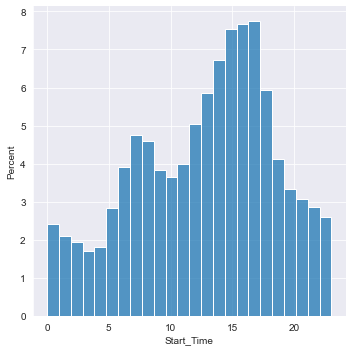

In [107]:
sns.displot(hour_accident,bins = 24,stat ='percent')

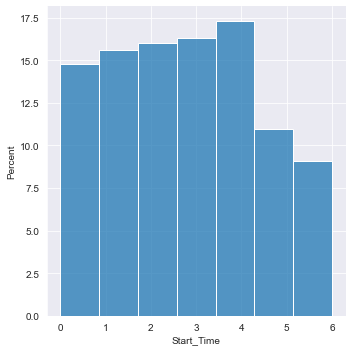

In [94]:
sns.displot(df.Start_Time.dt.dayofweek,bins = 7,stat ='percent')


In [110]:
sunday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==6]
saturday_start_time = df.Start_Time[df.Start_Time.dt.dayofweek==5]

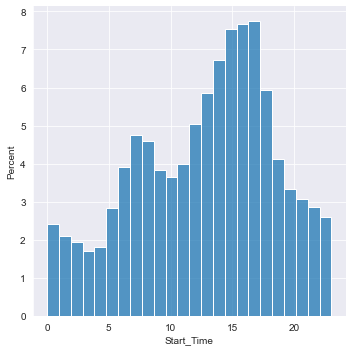

In [114]:
sns.displot(df.Start_Time.dt.hour,bins = 24,stat ='percent')

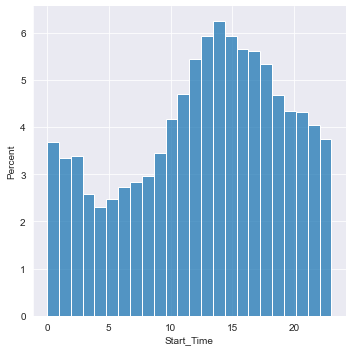

In [111]:
sns.displot(saturday_start_time.dt.hour,bins = 24,stat ='percent')

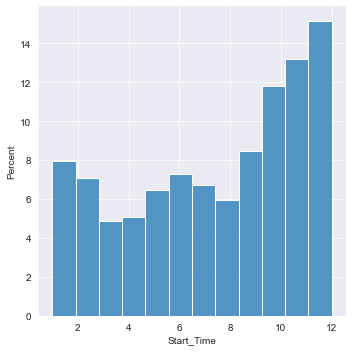

In [113]:
sns.displot(saturday_start_time.dt.month,bins = 12,stat ='percent')

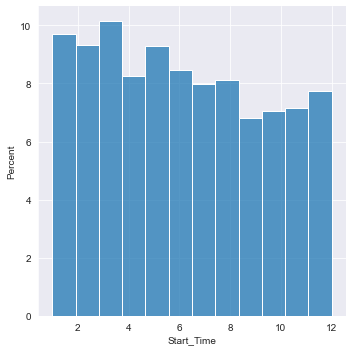

In [133]:
df_2019 = df[df.Start_Time.dt.year == 2017]
sns.displot(df_2019.Start_Time.dt.month,bins = 12,stat ='percent')

In [121]:
df.Start_Time.dt.year

0          2016
1          2016
2          2016
3          2016
4          2016
           ... 
2845337    2019
2845338    2019
2845339    2019
2845340    2019
2845341    2019
Name: Start_Time, Length: 2845342, dtype: int64

### Start lat, Start long

In [148]:
df.Start_Lng

In [152]:
df.Start_Lat

0          40.108910
1          39.865420
2          39.102660
3          41.062130
4          39.172393
             ...    
2845337    34.002480
2845338    32.766960
2845339    33.775450
2845340    33.992460
2845341    34.133930
Name: Start_Lat, Length: 2845342, dtype: float64

In [10]:
sample_df = df.sample(int(len(df)*0.1))

<AxesSubplot:xlabel='Start_Lng', ylabel='Start_Lat'>

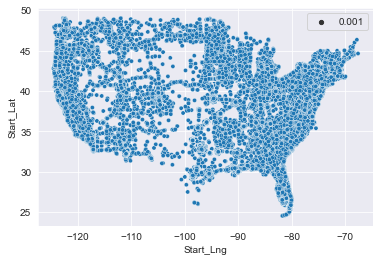

In [155]:
sns.scatterplot(x = sample_df.Start_Lng, y=sample_df.Start_Lat,size=0.001)

In [14]:
import folium

In [169]:
lat,lon = df.Start_Lat[0],df.Start_Lng[0]

In [191]:
lat,lon

(40.10891, -83.09286)

In [199]:
for i in df[['Start_Lat','Start_Lng']].sample(100).iteritems():
    print(i[1])

2590157    30.310740
1950552    27.140661
1286129    35.617101
1233706    35.032506
1216379    37.747216
             ...    
2070374    34.051250
908017     42.890625
2557326    38.243677
2372893    34.176930
1671412    40.095544
Name: Start_Lat, Length: 100, dtype: float64
2590157    -85.469440
1950552    -82.409745
1286129    -81.510466
1233706    -80.805991
1216379   -122.403630
              ...    
2070374   -118.005880
908017     -78.889990
2557326   -122.083577
2372893   -118.308027
1671412    -75.912828
Name: Start_Lng, Length: 100, dtype: float64


In [11]:
list(zip(list(df.Start_Lat),list(df.Start_Lng)))

[(40.10891, -83.09286),
 (39.86542, -84.0628),
 (39.10266, -84.52468),
 (41.06213, -81.53784),
 (39.172393, -84.49279200000002),
 (39.06324, -84.03243),
 (39.77565, -84.18603),
 (41.37531, -81.82016999999998),
 (40.702247, -84.075887),
 (40.10931, -82.96849),
 (39.19288, -84.47723),
 (39.13877, -84.53394),
 (41.4739, -81.704233),
 (39.582242, -83.677814),
 (40.151785, -81.312635),
 (40.151747, -81.312682),
 (39.97241, -82.84695),
 (39.9838, -82.85656999999998),
 (40.02664, -82.9944),
 (41.679361, -83.573037),
 (40.99613, -85.26613),
 (39.0381, -84.59243000000002),
 (40.03386, -82.99601),
 (39.85798, -84.28181),
 (39.15267, -84.5395),
 (39.30732, -85.95982),
 (39.77572, -84.04815),
 (39.97643, -83.12306),
 (39.58595, -85.82518),
 (39.3638, -85.51659000000002),
 (39.45132, -85.62516),
 (39.75067, -84.14148),
 (39.2675, -81.49929),
 (39.86025, -85.96623000000002),
 (41.95677, -83.67214),
 (38.27401, -85.74844),
 (41.95677, -83.67214),
 (40.52225, -80.06666),
 (40.487814, -80.009439),
 (40

In [12]:
lat_lon_pairs = list(zip(list(sample_df.Start_Lat),list(sample_df.Start_Lng)))

In [15]:
from folium.plugins import HeatMap

In [17]:
map = folium.Map()
HeatMap(lat_lon_pairs).add_to(map)
map

## Conclusion
> Less than 5% of cities have accident greater than 1000

> More than 1000 cities have 1 accident

>The peak hours of accidents happening are 3-4pm which is mostly when employees leave their work

>Less number of accidents in weekends and the occuring time for that is during the afternoon